# Лика Джиоева 182

In [214]:
import nltk

In [215]:
from nltk.corpus import wordnet as wn

In [216]:
import networkx as nx

In [217]:
import matplotlib.pyplot as plt

In [218]:
insect_synsets = wn.synsets('insect')
print (insect_synsets)

[Synset('insect.n.01'), Synset('worm.n.02')]


In [219]:
insect_exemplar = wn.synset('insect.n.01')

Все гипонимы синсета insect.n.01

In [220]:
print (insect_exemplar.hyponyms())

[Synset('beetle.n.01'), Synset('bird_louse.n.01'), Synset('bug.n.01'), Synset('collembolan.n.01'), Synset('defoliator.n.01'), Synset('dictyopterous_insect.n.01'), Synset('dipterous_insect.n.01'), Synset('earwig.n.01'), Synset('ephemerid.n.01'), Synset('ephemeron.n.01'), Synset('flea.n.01'), Synset('gallfly.n.03'), Synset('hemipterous_insect.n.01'), Synset('heteropterous_insect.n.01'), Synset('holometabola.n.01'), Synset('homopterous_insect.n.01'), Synset('hymenopterous_insect.n.01'), Synset('imago.n.02'), Synset('leaf_miner.n.01'), Synset('lepidopterous_insect.n.01'), Synset('louse.n.01'), Synset('mecopteran.n.01'), Synset('neuropteron.n.01'), Synset('odonate.n.01'), Synset('orthopterous_insect.n.01'), Synset('phasmid.n.01'), Synset('pollinator.n.01'), Synset('proturan.n.01'), Synset('psocopterous_insect.n.01'), Synset('pupa.n.01'), Synset('queen.n.01'), Synset('social_insect.n.01'), Synset('stonefly.n.01'), Synset('termite.n.01'), Synset('thysanopter.n.01'), Synset('thysanuran_insect.

In [221]:
insect_nodes = []
for i in insect_exemplar.hyponyms():
    insect_nodes.append(i.name())

In [222]:
len(insect_nodes)

39

In [226]:
sigh = []
for i1 in insect_exemplar.hyponyms():
    for i2 in insect_exemplar.hyponyms():
        if i1 != i2:
            wt = 0
            for j in wn.langs():
                for k in i1.lemma_names(j):
                    for l in i2.lemma_names(j):
                        if k == l:
                            wt += 1
            if wt != 0:
                sigh.append((i1.name(), i2.name(), float(wt)))        

In [227]:
sigh

[('beetle.n.01', 'bug.n.01', 1.0),
 ('bird_louse.n.01', 'louse.n.01', 6.0),
 ('bug.n.01', 'beetle.n.01', 1.0),
 ('bug.n.01', 'flea.n.01', 2.0),
 ('bug.n.01', 'hemipterous_insect.n.01', 13.0),
 ('bug.n.01', 'louse.n.01', 2.0),
 ('bug.n.01', 'thysanopter.n.01', 1.0),
 ('bug.n.01', 'thysanuran_insect.n.01', 1.0),
 ('bug.n.01', 'trichopterous_insect.n.01', 1.0),
 ('ephemerid.n.01', 'ephemeron.n.01', 2.0),
 ('ephemeron.n.01', 'ephemerid.n.01', 2.0),
 ('flea.n.01', 'bug.n.01', 2.0),
 ('flea.n.01', 'louse.n.01', 5.0),
 ('hemipterous_insect.n.01', 'bug.n.01', 13.0),
 ('louse.n.01', 'bird_louse.n.01', 6.0),
 ('louse.n.01', 'bug.n.01', 2.0),
 ('louse.n.01', 'flea.n.01', 5.0),
 ('thysanopter.n.01', 'bug.n.01', 1.0),
 ('thysanopter.n.01', 'thysanuran_insect.n.01', 1.0),
 ('thysanopter.n.01', 'trichopterous_insect.n.01', 1.0),
 ('thysanuran_insect.n.01', 'bug.n.01', 1.0),
 ('thysanuran_insect.n.01', 'thysanopter.n.01', 1.0),
 ('thysanuran_insect.n.01', 'trichopterous_insect.n.01', 1.0),
 ('trichopt

In [228]:
G = nx.Graph()
G.add_nodes_from(insect_nodes)
G.add_weighted_edges_from(sigh)

In [229]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 2.0]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 2.0]

Граф, где узлы -- гипонимы синсета X, а рёбра отражают колексификацию узлов. Толщина ребра отражает частоту колексификации.

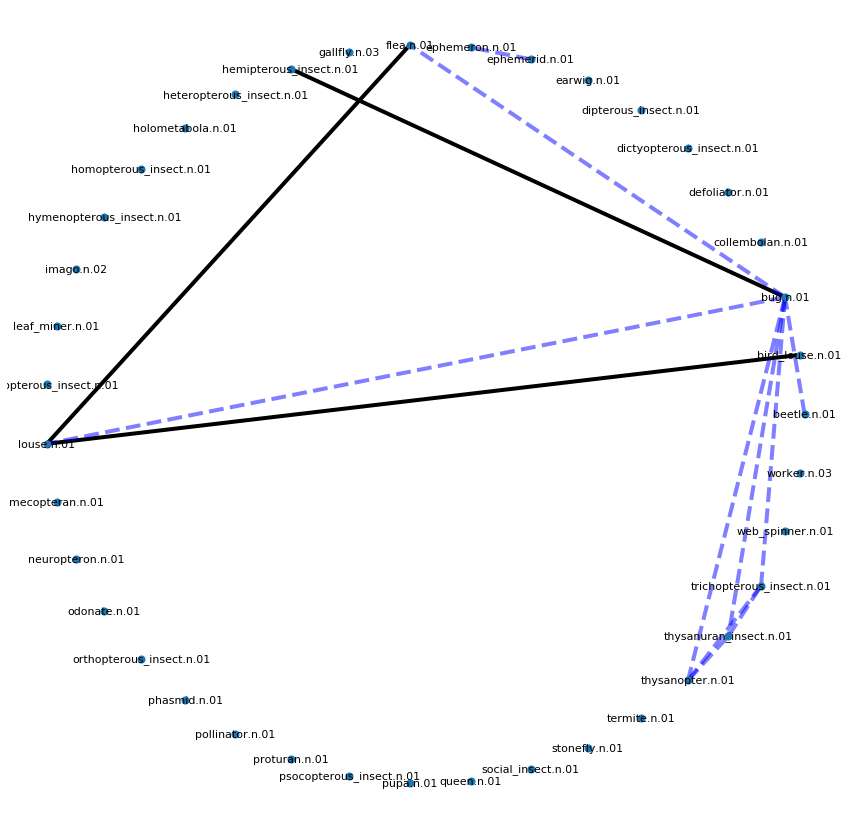

In [231]:
pos = nx.shell_layout(G)
plt.figure(figsize=(15, 15))
nx.draw_networkx_nodes(G, pos, node_size=50)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=4)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=4, alpha=0.5, edge_color='b', style='dashed')
nx.draw_networkx_labels(G, pos, font_size=11, font_family='sans-serif')

plt.axis('off')
plt.show()

Сколько получилось связных компонент?

In [232]:
cc = sorted(nx.connected_components(G))
len(cc)

30

Коэффициент ассортативности и плотность графа

In [233]:
print(nx.degree_pearson_correlation_coefficient(G))

-0.33705080545229243


In [234]:
print(nx.density(G))

0.017543859649122806


In [235]:
number_edges = len(G.edges())

In [236]:
weights = list(G.degree(weight='weight'))

In [237]:
trying = []
for i in weights:
    new = i[1] / number_edges
    trying.append((i[0], new))

Как распределились взвешенные степени узлов?

In [238]:
trying

[('beetle.n.01', 0.07692307692307693),
 ('bird_louse.n.01', 0.46153846153846156),
 ('bug.n.01', 1.6153846153846154),
 ('collembolan.n.01', 0.0),
 ('defoliator.n.01', 0.0),
 ('dictyopterous_insect.n.01', 0.0),
 ('dipterous_insect.n.01', 0.0),
 ('earwig.n.01', 0.0),
 ('ephemerid.n.01', 0.15384615384615385),
 ('ephemeron.n.01', 0.15384615384615385),
 ('flea.n.01', 0.5384615384615384),
 ('gallfly.n.03', 0.0),
 ('hemipterous_insect.n.01', 1.0),
 ('heteropterous_insect.n.01', 0.0),
 ('holometabola.n.01', 0.0),
 ('homopterous_insect.n.01', 0.0),
 ('hymenopterous_insect.n.01', 0.0),
 ('imago.n.02', 0.0),
 ('leaf_miner.n.01', 0.0),
 ('lepidopterous_insect.n.01', 0.0),
 ('louse.n.01', 1.0),
 ('mecopteran.n.01', 0.0),
 ('neuropteron.n.01', 0.0),
 ('odonate.n.01', 0.0),
 ('orthopterous_insect.n.01', 0.0),
 ('phasmid.n.01', 0.0),
 ('pollinator.n.01', 0.0),
 ('proturan.n.01', 0.0),
 ('psocopterous_insect.n.01', 0.0),
 ('pupa.n.01', 0.0),
 ('queen.n.01', 0.0),
 ('social_insect.n.01', 0.0),
 ('stonefl

Метрики важности

In [239]:
deg = nx.degree_centrality(G)
for nodeid in sorted(deg, key=deg.get, reverse=True):
    print(nodeid)

bug.n.01
louse.n.01
thysanopter.n.01
thysanuran_insect.n.01
trichopterous_insect.n.01
flea.n.01
beetle.n.01
bird_louse.n.01
ephemerid.n.01
ephemeron.n.01
hemipterous_insect.n.01
collembolan.n.01
defoliator.n.01
dictyopterous_insect.n.01
dipterous_insect.n.01
earwig.n.01
gallfly.n.03
heteropterous_insect.n.01
holometabola.n.01
homopterous_insect.n.01
hymenopterous_insect.n.01
imago.n.02
leaf_miner.n.01
lepidopterous_insect.n.01
mecopteran.n.01
neuropteron.n.01
odonate.n.01
orthopterous_insect.n.01
phasmid.n.01
pollinator.n.01
proturan.n.01
psocopterous_insect.n.01
pupa.n.01
queen.n.01
social_insect.n.01
stonefly.n.01
termite.n.01
web_spinner.n.01
worker.n.03


In [240]:
cl = nx.closeness_centrality(G)
for nodeid in sorted(cl, key=cl.get, reverse=True):
    print(nodeid)

bug.n.01
louse.n.01
flea.n.01
thysanopter.n.01
thysanuran_insect.n.01
trichopterous_insect.n.01
beetle.n.01
hemipterous_insect.n.01
bird_louse.n.01
ephemerid.n.01
ephemeron.n.01
collembolan.n.01
defoliator.n.01
dictyopterous_insect.n.01
dipterous_insect.n.01
earwig.n.01
gallfly.n.03
heteropterous_insect.n.01
holometabola.n.01
homopterous_insect.n.01
hymenopterous_insect.n.01
imago.n.02
leaf_miner.n.01
lepidopterous_insect.n.01
mecopteran.n.01
neuropteron.n.01
odonate.n.01
orthopterous_insect.n.01
phasmid.n.01
pollinator.n.01
proturan.n.01
psocopterous_insect.n.01
pupa.n.01
queen.n.01
social_insect.n.01
stonefly.n.01
termite.n.01
web_spinner.n.01
worker.n.03


In [241]:
b = nx.betweenness_centrality(G)
for nodeid in sorted(b, key=b.get, reverse=True):
    print(nodeid)

bug.n.01
louse.n.01
beetle.n.01
bird_louse.n.01
collembolan.n.01
defoliator.n.01
dictyopterous_insect.n.01
dipterous_insect.n.01
earwig.n.01
ephemerid.n.01
ephemeron.n.01
flea.n.01
gallfly.n.03
hemipterous_insect.n.01
heteropterous_insect.n.01
holometabola.n.01
homopterous_insect.n.01
hymenopterous_insect.n.01
imago.n.02
leaf_miner.n.01
lepidopterous_insect.n.01
mecopteran.n.01
neuropteron.n.01
odonate.n.01
orthopterous_insect.n.01
phasmid.n.01
pollinator.n.01
proturan.n.01
psocopterous_insect.n.01
pupa.n.01
queen.n.01
social_insect.n.01
stonefly.n.01
termite.n.01
thysanopter.n.01
thysanuran_insect.n.01
trichopterous_insect.n.01
web_spinner.n.01
worker.n.03


In [242]:
ei = nx.eigenvector_centrality(G)
for nodeid in sorted(ei, key=ei.get, reverse=True):
    print(nodeid)

bug.n.01
thysanopter.n.01
thysanuran_insect.n.01
trichopterous_insect.n.01
louse.n.01
flea.n.01
beetle.n.01
hemipterous_insect.n.01
bird_louse.n.01
ephemerid.n.01
ephemeron.n.01
collembolan.n.01
defoliator.n.01
dictyopterous_insect.n.01
dipterous_insect.n.01
earwig.n.01
gallfly.n.03
heteropterous_insect.n.01
holometabola.n.01
homopterous_insect.n.01
hymenopterous_insect.n.01
imago.n.02
leaf_miner.n.01
lepidopterous_insect.n.01
mecopteran.n.01
neuropteron.n.01
odonate.n.01
orthopterous_insect.n.01
phasmid.n.01
pollinator.n.01
proturan.n.01
psocopterous_insect.n.01
pupa.n.01
queen.n.01
social_insect.n.01
stonefly.n.01
termite.n.01
web_spinner.n.01
worker.n.03


Можно сказать, что bug победитель по всем фронтам! Самый важный узел. У меня есть маленькая теория о том, что bug такой популярный, потому что самый...простой? Например, hemipterous_insect тоже в топе, хоть и не высоко. Кто такой hemipterous_insect? Да это же клоп! В народе bed bug (поэтому у них такая большая частота колексификации с bug). Louse, flea, beetle тоже высоко. А вот как объяснить важность thysanopter.n.01, thysanuran_insect.n.01 не знаю...

In [243]:
from networkx.algorithms import community

Сообщества (алгоритм girvan_newman)

In [244]:
communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
print("top level communities:", sorted(map(sorted, top_level_communities)))
print("next level communities:", sorted(map(sorted, next_level_communities)))

top level communities: [['beetle.n.01', 'bug.n.01', 'hemipterous_insect.n.01', 'thysanopter.n.01', 'thysanuran_insect.n.01', 'trichopterous_insect.n.01'], ['bird_louse.n.01', 'flea.n.01', 'louse.n.01'], ['collembolan.n.01'], ['defoliator.n.01'], ['dictyopterous_insect.n.01'], ['dipterous_insect.n.01'], ['earwig.n.01'], ['ephemerid.n.01', 'ephemeron.n.01'], ['gallfly.n.03'], ['heteropterous_insect.n.01'], ['holometabola.n.01'], ['homopterous_insect.n.01'], ['hymenopterous_insect.n.01'], ['imago.n.02'], ['leaf_miner.n.01'], ['lepidopterous_insect.n.01'], ['mecopteran.n.01'], ['neuropteron.n.01'], ['odonate.n.01'], ['orthopterous_insect.n.01'], ['phasmid.n.01'], ['pollinator.n.01'], ['proturan.n.01'], ['psocopterous_insect.n.01'], ['pupa.n.01'], ['queen.n.01'], ['social_insect.n.01'], ['stonefly.n.01'], ['termite.n.01'], ['web_spinner.n.01'], ['worker.n.03']]
next level communities: [['beetle.n.01'], ['bird_louse.n.01', 'flea.n.01', 'louse.n.01'], ['bug.n.01', 'hemipterous_insect.n.01', '

Ощущение что сильно эти коммьюнити не поменялись (Но вроде так и должно быть)...Конечно же связанные с bug гипонимы вместе в первом top level community.

Алгоритм greedy_modularity_communities

In [245]:
from networkx.algorithms.community import greedy_modularity_communities
c = list(greedy_modularity_communities(G))
sorted(c)

[frozenset({'beetle.n.01',
            'bird_louse.n.01',
            'bug.n.01',
            'flea.n.01',
            'hemipterous_insect.n.01',
            'louse.n.01',
            'thysanopter.n.01',
            'thysanuran_insect.n.01',
            'trichopterous_insect.n.01'}),
 frozenset({'ephemerid.n.01', 'ephemeron.n.01'}),
 frozenset({'collembolan.n.01'}),
 frozenset({'defoliator.n.01'}),
 frozenset({'dictyopterous_insect.n.01'}),
 frozenset({'dipterous_insect.n.01'}),
 frozenset({'earwig.n.01'}),
 frozenset({'gallfly.n.03'}),
 frozenset({'heteropterous_insect.n.01'}),
 frozenset({'holometabola.n.01'}),
 frozenset({'homopterous_insect.n.01'}),
 frozenset({'hymenopterous_insect.n.01'}),
 frozenset({'imago.n.02'}),
 frozenset({'leaf_miner.n.01'}),
 frozenset({'lepidopterous_insect.n.01'}),
 frozenset({'mecopteran.n.01'}),
 frozenset({'neuropteron.n.01'}),
 frozenset({'odonate.n.01'}),
 frozenset({'orthopterous_insect.n.01'}),
 frozenset({'phasmid.n.01'}),
 frozenset({'pollinato

Опять-таки, сверху уже хорошо известная мне компания с bug, так как плотность связей внутри нее больше.